### Mirror Descent MPI


In [4]:
import numpy as np
import random
from typing import NamedTuple
from  scipy.special import softmax
import matplotlib.pyplot as plt


In [2]:

S = 2
A = 3
S_set = np.arange(S)
A_set = np.arange(A)
gamma = 0.6

#例1.5準拠
#g(s,a)
g = np.zeros((S,A))
g[0][0] = 5
g[0][1] = 10
g[0][2] = 2
g[1][0] = 1


#P(s'|s,a)
P = np.zeros((S,S,A))
P[0][0][0] = 0.8
P[1][0][0] = 0.2
P[1][0][1] = 1
P[0][0][2] = 1
P[1][1][0] = 1
P = np.transpose(P, (1, 2, 0))


class MDP(NamedTuple):
    S_set: np.array  # 状態集合
    A_set: np.array  # 行動集合
    gamma: float  # 割引率
    g: np.array  # 報酬行列
    P: np.array  # 遷移確率行列

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)

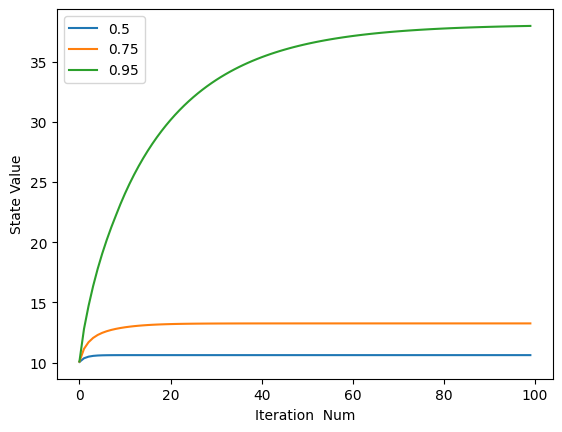

In [6]:
pi = np.zeros((S,A))
#決定的方策を作成
#softmax方策を作る必要がある
pi[0][0] = 1
pi[1][1] = 1
v = np.zeros(S)
entropy_term = 0.1
mdp2 = MDP(S_set, A_set, 0.5, g, P)


_lambda = 0.1
tau = 0.1
#regularized greedy policyの定義
def KL_divergence(p, q):
    return np.sum(p * (np.log(p)-np.log(q)))

def entropy(p):
    return -np.sum(p * np.log(p))

#πの集合、muはどうやって定義するのか
PI = []
mu = []
#muがpkになる
#pi *
def function_for_calc_greedy_policy(Q,pi,mu,_lambda,tau)
    return np.sum(pi * Q) - _lambda * KL_divergence(pi, mu) + tau * entropy(pi)

def compute_regularized_greedy_policy(Q):
  max_result = -float('inf')
  for pi in PI:
    result = function_for_calc_greedy_policy(Q,pi,mu,_lambda,tau)
    if result > max_result:
            max_result = result
            max_pi = pi

  return max_pi


def compute_Q_pi_with_regularized_term(mdp2,Q,pi):
    S,A = mdp2.S,mdp2.A
    v = np.sum(pi * Q,axis = 1)
    P_v = P @ (v -  0.1 * KL_divergence(pi,mu)+entropy(pi))
    Q_pi = g + mdp2.gamma * P_v
    return Q_pi




def compute_Q_pi(mdp2,Q,pi):
    S,A = mdp2.S,mdp2.A
    v = np.sum(pi * Q,axis = 1)
    P_v = P @ (v -  0.1 * np.sum( pi * np.log(pi+1e-8),axis = 1))
    Q_pi = g + mdp2.gamma * P_v
    return Q_pi

updated_v = v
gammas = [0.5,0.75,0.95]
for gamma in gammas:
    mdp2 = mdp2._replace(gamma=gamma)
    v_value = []
    pi = np.ones((S,A))/A
    Q = np.zeros((S,A))
    for i in range(100):
        Q= compute_Q_pi(mdp2,Q,pi)
        pi = softmax(Q,axis=1)
        v_value.append(Q.max())
    plt.plot(v_value,label = f"{gamma}")

plt.ylabel("State Value")
plt.xlabel("Iteration  Num")

plt.legend()